In [1]:
##argopy Task 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import argopy

In [3]:
from argopy import DataFetcher as ArgoDataFetcher
argo_loader = ArgoDataFetcher()
argo_loader

<datafetcher> 'Not initialised'
Current backend: erddap
Available fetchers: profile, float, region
User mode: standard

In [4]:
##Load data from two argo floats - float numbers chosen using argopy.dashboard()

ds = argo_loader.float([6902754, 6902696]).to_xarray() 
print(ds)

<xarray.Dataset>
Dimensions:                (N_POINTS: 30654)
Coordinates:
  * N_POINTS               (N_POINTS) int64 0 1 2 3 ... 30650 30651 30652 30653
    LATITUDE               (N_POINTS) float64 58.54 58.54 58.54 ... 43.5 43.5
    LONGITUDE              (N_POINTS) float64 -30.2 -30.2 ... -45.29 -45.29
    TIME                   (N_POINTS) datetime64[ns] 2017-02-01T15:46:00 ... ...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 2 2 2 2 2 2 2 2
    CYCLE_NUMBER           (N_POINTS) int64 1 1 1 1 1 1 ... 160 160 160 160 160
    DATA_MODE              (N_POINTS) <U1 'D' 'D' 'D' 'D' ... 'A' 'A' 'A' 'A'
    DIRECTION              (N_POINTS) <U1 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_POINTS) int64 6902696 6902696 ... 6902696 6902696
    POSITION_QC            (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    PRES_QC                (N_POINTS) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 

In [5]:
df = ds.to_dataframe() ##Covert data to a pandas dataframe

In [6]:
df.to_csv (r'argopy_task2.csv', index = False, header=True)  ##Export data to a csv file

In [7]:
df = pd.read_csv('argopy_task2.csv', parse_dates=[15]) ##Load in csv file and identify date columns

In [8]:
df

,CONFIG_MISSION_NUMBER,CYCLE_NUMBER,DATA_MODE,DIRECTION,PLATFORM_NUMBER,POSITION_QC,PRES,PRES_QC,PSAL,PSAL_QC,TEMP,TEMP_QC,TIME_QC,LATITUDE,LONGITUDE,TIME
0,1,1,D,A,6902696,1,6.0,1,34.994,1,6.733,1,1,58.540,-30.197,2017-02-01 15:46:00
1,1,1,D,A,6902696,1,9.0,1,34.993,1,6.741,1,1,58.540,-30.197,2017-02-01 15:46:00
2,1,1,D,A,6902696,1,16.0,1,34.998,1,6.732,1,1,58.540,-30.197,2017-02-01 15:46:00
3,1,1,D,A,6902696,1,26.0,1,34.994,1,6.723,1,1,58.540,-30.197,2017-02-01 15:46:00
4,1,1,D,A,6902696,1,36.0,1,34.995,1,6.726,1,1,58.540,-30.197,2017-02-01 15:46:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30649,2,160,A,A,6902696,1,1913.0,1,34.943,1,3.657,1,1,43.503,-45.292,2021-06-10 01:02:00
30650,2,160,A,A,6902696,1,1938.0,1,34.943,1,3.646,1,1,43.503,-45.292,2021-06-10 01:02:00
30651,2,160,A,A,6902696,1,1963.0,1,34.944,1,3.637,1,1,43.503,-45.292,2021-06-10 01:02:00
30652,2,160,A,A,6902696,1,1988.0,1,34.944,1,3.627,1,1,43.503,-45.292,2021-06-10 01:02:00


In [9]:
#Make two dataframes - one for each platform number

df_6902754 = df[df.PLATFORM_NUMBER == 6902754]
df_6902696 = df[df.PLATFORM_NUMBER == 6902696]

In [10]:
import geopandas as gpd

In [11]:
##Dataframe from geopandas used to plot countries and continents

countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


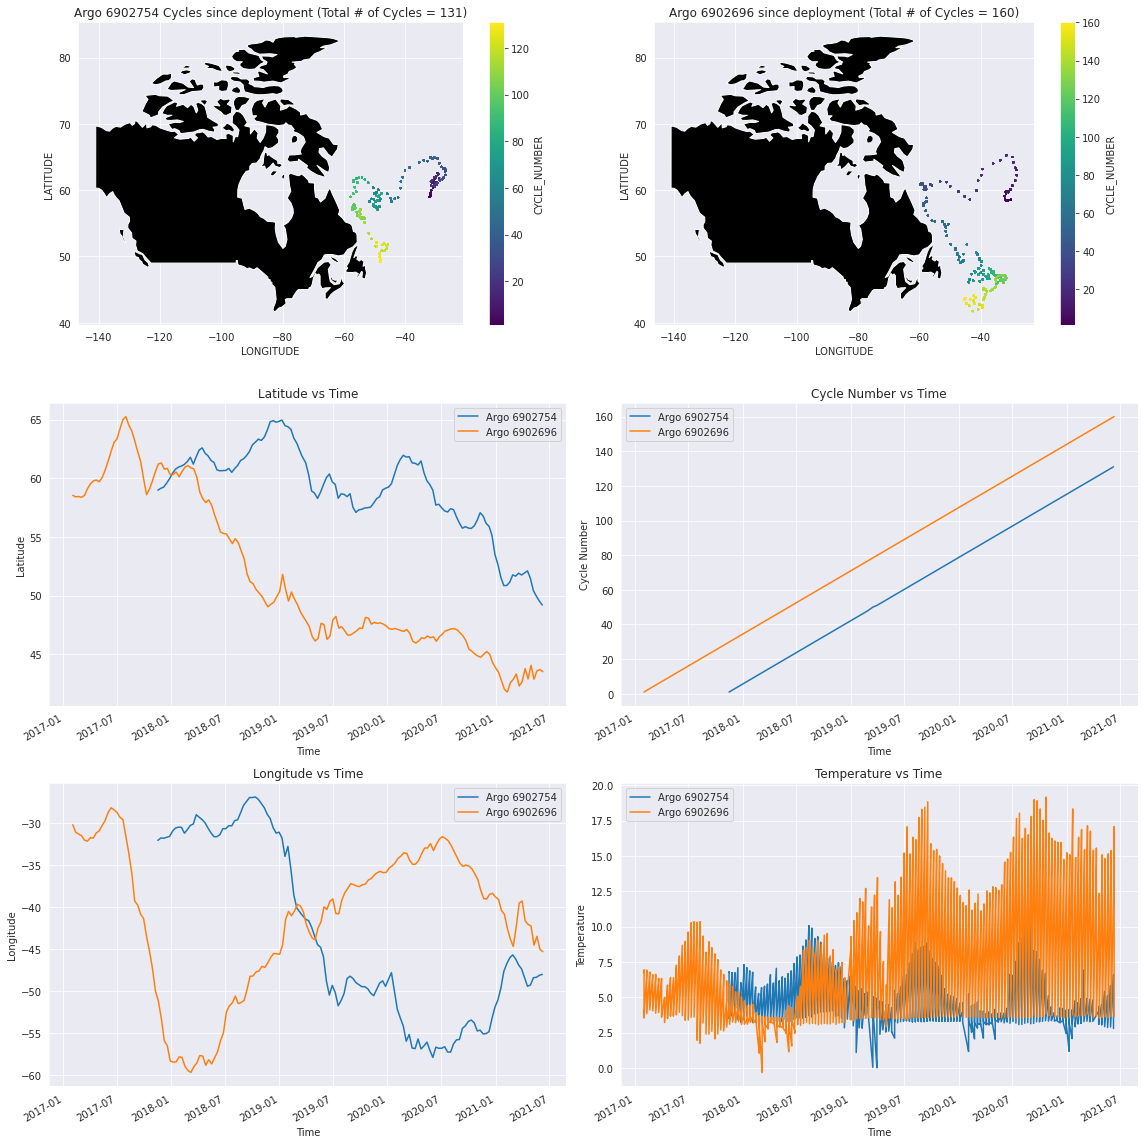

In [17]:
# Start the plot - plot the trajectory of two argo floats
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16,12))

# Plot Canada on the map in [0,0]

countries[countries["name"] == "Canada"].plot(ax=ax[0,0],color="black")
countries[countries["name"] == "Canada"].plot(ax=ax[0,1],color="black")

# Make four plots with different position data sets recorded since 2017

df_6902754.plot(ax=ax[0,0], x="LONGITUDE", y="LATITUDE", kind="scatter", c="CYCLE_NUMBER", colormap="viridis", s=1, figsize=(16,16))
ax[0, 0].set_title("Argo 6902754 Cycles since deployment (Total # of Cycles = 131)")

df_6902696.plot(ax=ax[0,1], x="LONGITUDE", y="LATITUDE", kind="scatter", c="CYCLE_NUMBER", colormap="viridis", s=1, figsize=(16,16))
ax[0, 1].set_title("Argo 6902696 since deployment (Total # of Cycles = 160)")

df_6902754.plot(ax=ax[1,0], x="TIME", y="LATITUDE")
df_6902696.plot(ax=ax[1,0], x="TIME", y="LATITUDE")
ax[1, 0].set(xlabel='Time', ylabel='Latitude')
ax[1, 0].set_title("Latitude vs Time")
ax[1, 0].legend(["Argo 6902754", "Argo 6902696"])

df_6902754.plot(ax=ax[1,1], x="TIME", y="CYCLE_NUMBER")
df_6902696.plot(ax=ax[1,1], x="TIME", y="CYCLE_NUMBER")
ax[1, 1].set(xlabel='Time', ylabel='Cycle Number')
ax[1, 1].set_title("Cycle Number vs Time")
ax[1, 1].legend(["Argo 6902754", "Argo 6902696"])

df_6902754.plot(ax=ax[2,0], x="TIME", y="LONGITUDE")
df_6902696.plot(ax=ax[2,0], x="TIME", y="LONGITUDE")
ax[2, 0].set(xlabel='Time', ylabel='Longitude')
ax[2, 0].set_title("Longitude vs Time")
ax[2, 0].legend(["Argo 6902754", "Argo 6902696"])

df_6902754.plot(ax=ax[2,1], x="TIME", y="TEMP")
df_6902696.plot(ax=ax[2,1], x="TIME", y="TEMP")
ax[2, 1].set(xlabel='Time', ylabel='Temperature')
ax[2, 1].set_title("Temperature vs Time")
ax[2, 1].legend(["Argo 6902754", "Argo 6902696"])


# Add grids and plot layout
ax[0, 0].grid()
ax[1, 0].grid()
ax[1, 1].grid()
ax[0, 1].grid()
ax[2, 0].grid()
ax[2, 1].grid()

fig.tight_layout()
plt.show()